# **Packages Importing**

In [1]:
import os
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
import seaborn as sns

# Defining the path of the files

In [2]:
path = 'Harry-Potter'
files_list = sorted(os.listdir(path))
dirs_list = [os.path.join(path, files_list[i]) for i in range(len(os.listdir(path)))]
dirs_list

['Harry-Potter\\Book1.txt',
 'Harry-Potter\\Book2.txt',
 'Harry-Potter\\Book3.txt',
 'Harry-Potter\\Book4.txt',
 'Harry-Potter\\Book5.txt',
 'Harry-Potter\\Book6.txt',
 'Harry-Potter\\Book7.txt',
 'Harry-Potter\\characters_list.csv']

# Reading the key names

In [3]:
keynames = pd.read_csv(dirs_list[-1])
keynames = keynames['name']
print(keynames)


0     Regulus Arcturus Black
1               Sirius Black
2             Lavender Brown
3                  Cho Chang
4         Vincent Crabbe Sr.
               ...          
60                    Fluffy
61                    Hedwig
62            Moaning Myrtle
63                    Aragog
64                     Grawp
Name: name, Length: 65, dtype: object


# Removing the key names file from list of files

In [4]:
dirs_list = dirs_list[:-1]
dirs_list

['Harry-Potter\\Book1.txt',
 'Harry-Potter\\Book2.txt',
 'Harry-Potter\\Book3.txt',
 'Harry-Potter\\Book4.txt',
 'Harry-Potter\\Book5.txt',
 'Harry-Potter\\Book6.txt',
 'Harry-Potter\\Book7.txt']

# Defining a dictionary to store the results

In [5]:
book_nums = [files_list[i].split('.')[0] for i in range(7)]
result = {i:{k:0 for k in keynames} for i in book_nums}
result

{'Book1': {'Regulus Arcturus Black': 0,
  'Sirius Black': 0,
  'Lavender Brown': 0,
  'Cho Chang': 0,
  'Vincent Crabbe Sr.': 0,
  'Vincent Crabbe': 0,
  'Bartemius "Barty" Crouch Sr.': 0,
  'Bartemius "Barty" Crouch Jr.': 0,
  'Fleur Delacour': 0,
  'Cedric Diggory': 0,
  'Alberforth Dumbledore': 0,
  'Albus Dumbledore': 0,
  'Dudley Dursley': 0,
  'Petunia Dursley': 0,
  'Vernon Dursley': 0,
  'Argus Filch': 0,
  'Seamus Finnigan': 0,
  'Nicolas Flamel': 0,
  'Cornelius Fudge': 0,
  'Goyle Sr.': 0,
  'Gregory Goyle': 0,
  'Hermione Granger': 0,
  'Rubeus Hagrid': 0,
  'Igor Karkaroff': 0,
  'Viktor Krum': 0,
  'Bellatrix Lestrange': 0,
  'Alice Longbottom': 0,
  'Frank Longbottom': 0,
  'Neville Longbottom': 0,
  'Luna Lovegood': 0,
  'Xenophilius Lovegood': 0,
  'Remus Lupin': 0,
  'Draco Malfoy': 0,
  'Lucius Malfoy': 0,
  'Narcissa Malfoy': 0,
  'Olympe Maxime': 0,
  'Minerva McGonagall': 0,
  'Alastor "Mad-Eye" Moody': 0,
  'Peter Pettigrew': 0,
  'Harry Potter': 0,
  'James Pott

# Counting of each name in each book

In [6]:
for i in range(len(dirs_list)):
    file = open(dirs_list[i], 'r')
    HP_book = file.read()
    HP_sents = sent_tokenize(HP_book)
    
    for k in keynames:
        c = 0
        for s in HP_sents:
            if k in s:
                c += 1
        result[book_nums[i]][k] = c
    
result

{'Book1': {'Regulus Arcturus Black': 0,
  'Sirius Black': 1,
  'Lavender Brown': 0,
  'Cho Chang': 0,
  'Vincent Crabbe Sr.': 0,
  'Vincent Crabbe': 0,
  'Bartemius "Barty" Crouch Sr.': 0,
  'Bartemius "Barty" Crouch Jr.': 0,
  'Fleur Delacour': 0,
  'Cedric Diggory': 0,
  'Alberforth Dumbledore': 0,
  'Albus Dumbledore': 6,
  'Dudley Dursley': 0,
  'Petunia Dursley': 0,
  'Vernon Dursley': 1,
  'Argus Filch': 1,
  'Seamus Finnigan': 3,
  'Nicolas Flamel': 11,
  'Cornelius Fudge': 1,
  'Goyle Sr.': 0,
  'Gregory Goyle': 0,
  'Hermione Granger': 15,
  'Rubeus Hagrid': 2,
  'Igor Karkaroff': 0,
  'Viktor Krum': 0,
  'Bellatrix Lestrange': 0,
  'Alice Longbottom': 0,
  'Frank Longbottom': 0,
  'Neville Longbottom': 1,
  'Luna Lovegood': 0,
  'Xenophilius Lovegood': 0,
  'Remus Lupin': 0,
  'Draco Malfoy': 9,
  'Lucius Malfoy': 0,
  'Narcissa Malfoy': 0,
  'Olympe Maxime': 0,
  'Minerva McGonagall': 1,
  'Alastor "Mad-Eye" Moody': 0,
  'Peter Pettigrew': 0,
  'Harry Potter': 369,
  'James 

# Heatmap of the results

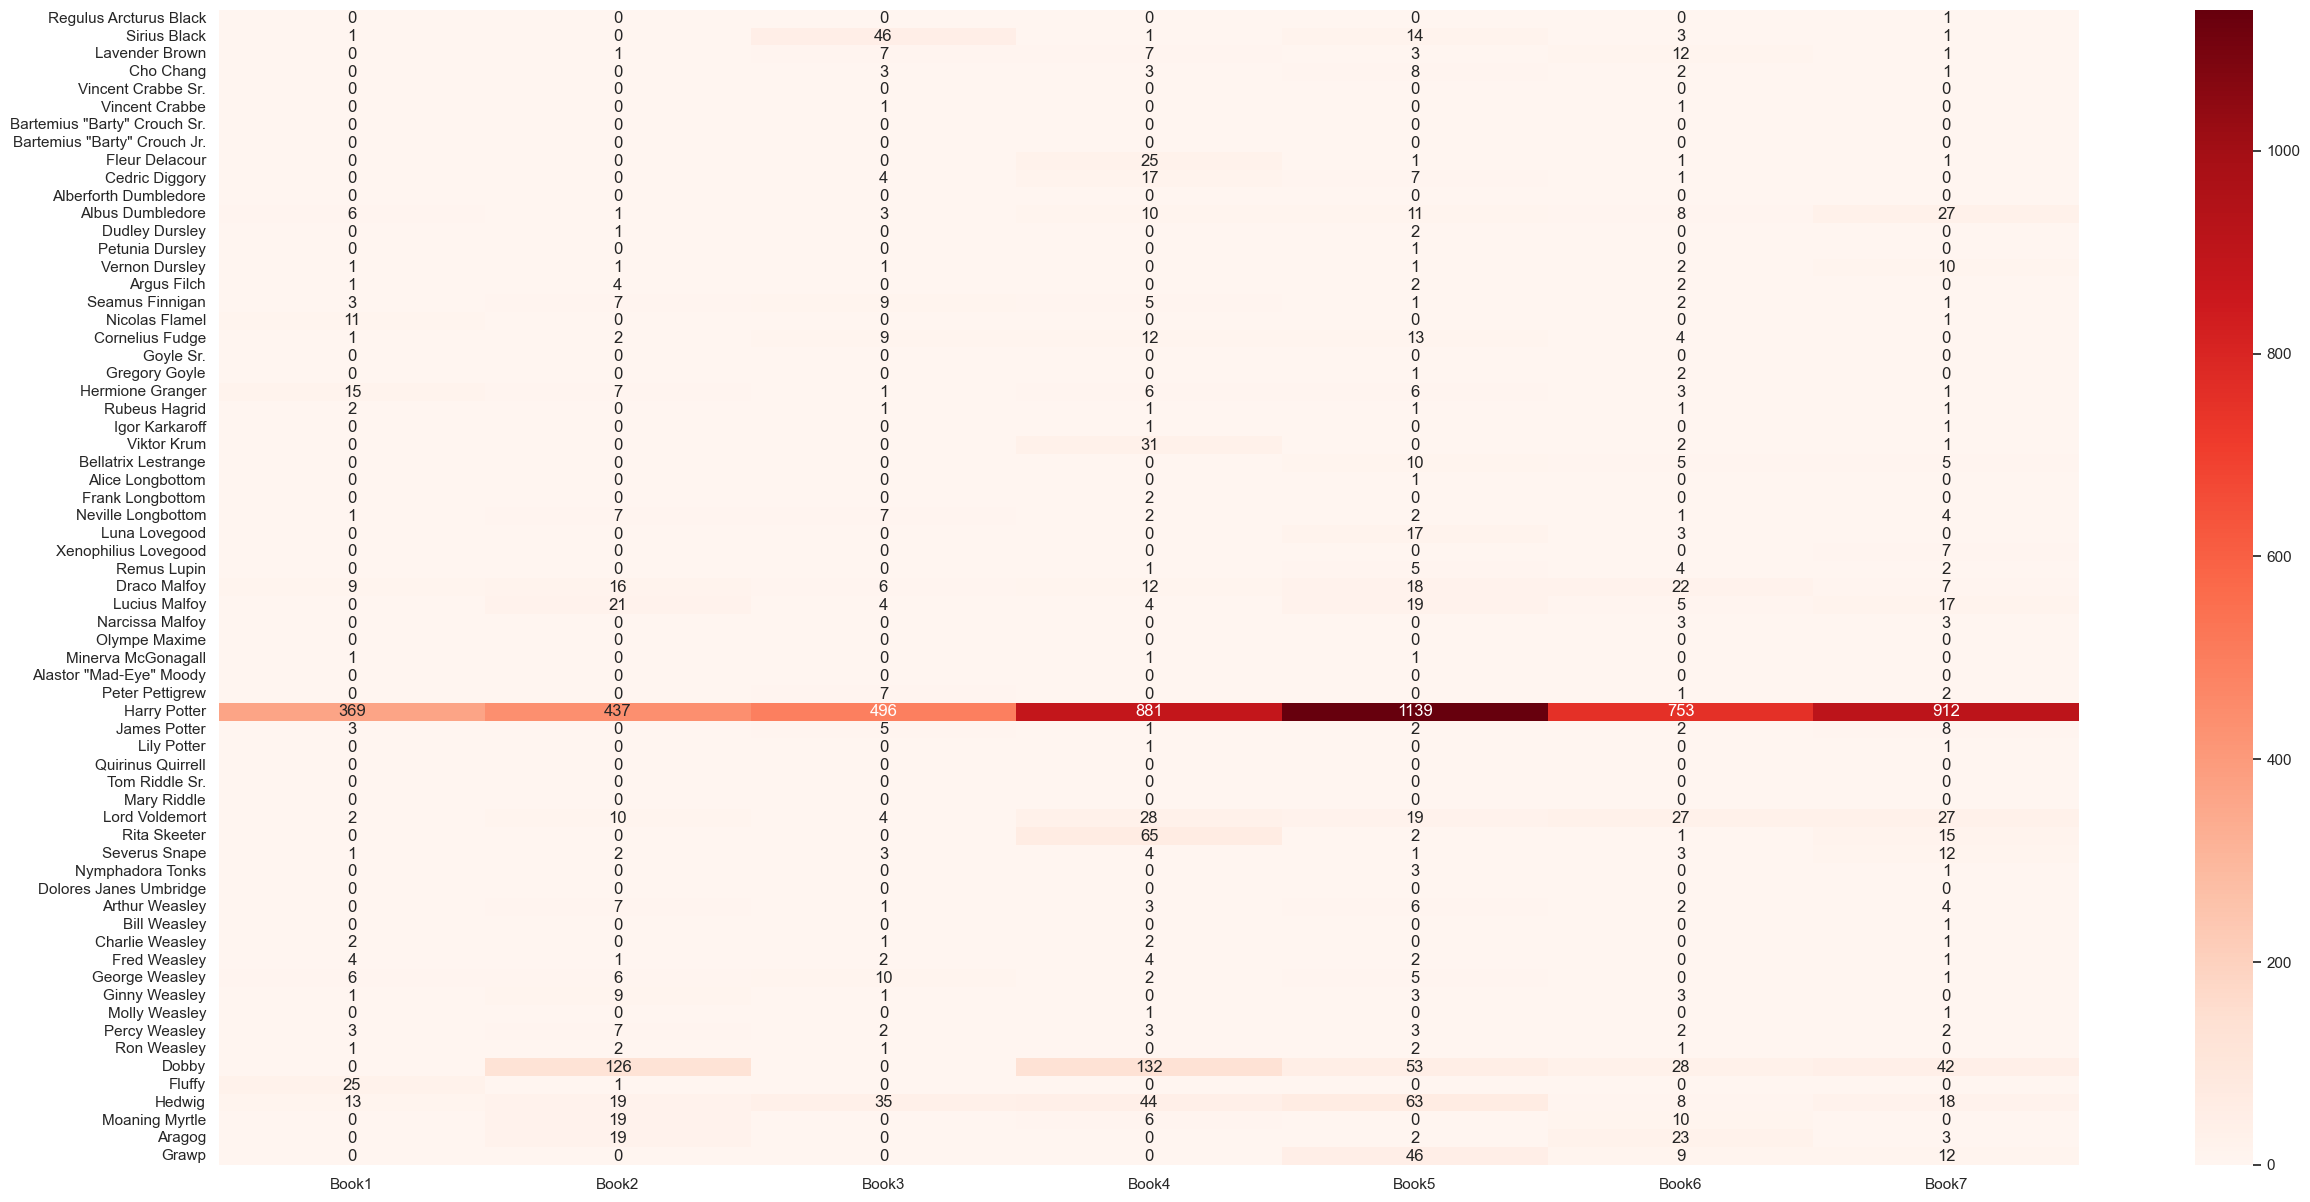

In [7]:
sns.set(rc={"figure.figsize":(30,15)})

df = pd.DataFrame(result)
g = sns.heatmap(df, cmap = "Reds", annot = True, fmt = 'g')
g.get_figure().savefig("heatmap.png")